##### Here we take workplaces data and process this data to approrpiate format for us. Also we add possibility to split workplaces.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import time as time
import random
from tqdm import tqdm
from scipy.stats import binom
from shapely import geometry
import geopandas as gpd

In [2]:
### INPUT PATH - CHANGE TO NEEDED CITY
city_name = 'chelyabinsk'
###
input_path = '../data/initial_' + city_name + '/workplaces_' + city_name + '.xlsx'
output_path = '../data/initial_' + city_name + '/workplaces_' + city_name + '.txt'
###
workplaces = pd.read_excel(input_path)
workplaces.head()

,name,cookies_matched_quantity,polygons.points.latitude,polygons.points.longitude
0,312,105,55.186587,61.579255
1,312,105,55.195561,61.588332
2,312,105,55.195561,61.606484
3,312,105,55.186587,61.615560
4,312,105,55.177611,61.606484


In [3]:
# workplaces_processed = pd.DataFrame(columns=['sp_id', 'latitude', 'longitude', 'size'], 
#                                     dtype = ["O", pd.np.int64, "O"])

workplaces_processed = pd.DataFrame({'sp_id':pd.Series([], dtype='int'),
                   'latitude':pd.Series([], dtype='float'),
                   'longitude':pd.Series([], dtype='float'),
                   'size':pd.Series([], dtype='int')})
polygon = []
max_sp_id = int(1)
for index in range(len(workplaces)):
    row = workplaces.iloc[index]
    point = geometry.Point(row['polygons.points.latitude'], row['polygons.points.longitude'])
    if index%7 == 6:
        polygon.append(point)
        hexagon = geometry.Polygon(polygon)
        centroid = hexagon.centroid
        # print(centroid)
        workplaces_processed.loc[len(workplaces_processed.index)] = [int(max_sp_id), centroid.x, centroid.y, 
                                                                     int(row['cookies_matched_quantity']/4.2)] 
        # TODO get new good data (divided by 5 for normalization)
        max_sp_id+=1
        polygon = []
        # print(workplaces.iloc[index]['name'])
    else:
        polygon.append(point)

In [4]:
workplaces_processed.to_csv(output_path, sep='\t', index=False)
# workplaces_processed.info()
print("Total number of places for workers:", int(workplaces_processed['size'].sum()))

Total number of places for workers: 867317


In [5]:
workplaces_processed.head(20)

,sp_id,latitude,longitude,size
0,1.0,55.186586,61.597408,25.0
1,2.0,55.159652,61.570179,31.0
2,3.0,55.177610,61.570179,41.0
3,4.0,55.195560,61.570179,41.0
4,5.0,55.213502,61.570179,28.0
5,6.0,55.231435,61.570179,7.0
6,7.0,55.078741,61.542950,35.0
7,8.0,55.096735,61.542950,387.0
8,9.0,55.114722,61.542950,2622.0
9,10.0,55.132700,61.542950,30.0


##### After that we want to split workplaces for smaller parts (with 8.5 workers mean per workplace)

In [6]:
# def generate_distribution_data(sum, num_of_samples):
#     data = []
#     n_i = num_of_samples
#     y_i = sum
#     for i in range(num_of_samples):
#         x_i = binom.rvs(y_i, 1/n_i, size=1)[0]
#         data.append(x_i)
#         y_i = y_i - x_i
#         n_i = n_i - 1
#     return data

# work_id_old = workplaces_processed['sp_id'].unique() #old indexing of workplaces
# wp_splitted = pd.DataFrame(columns=['sp_id', 'sp_hh_id', 'age',	'sex',	'race',	'relate', 'school_id', 'work_id'])
# households_splitted = pd.DataFrame(columns=['sp_id', 'hh_size',	'latitude', 'longitude'])
# hh_id_max = 1


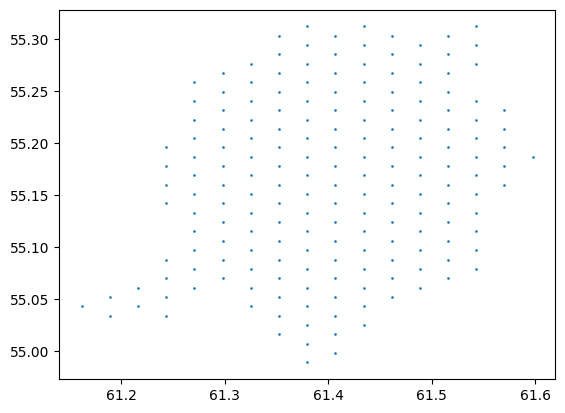

In [7]:
plt.scatter(workplaces_processed['longitude'], workplaces_processed['latitude'], s=0.8)
# plt.scatter(workplaces['polygons.points.longitude'][450], workplaces['polygons.points.latitude'][450], color='red')